## Linear Regression Practical Implementation

In [1]:
import pandas as pd

In [11]:
from sklearn.datasets import fetch_california_housing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=fetch_california_housing()

In [16]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [20]:
dataset= pd.DataFrame(df.data)

In [21]:
dataset.columns=df.feature_names

In [22]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
## Independent features and dependent features
X=dataset #Independent
y=df.target #dependent

In [25]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [26]:
## train test split
from sklearn .model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.30, random_state=42)

In [30]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


# Now implementing Linear Regression in this Data set

In [32]:
## standarizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [42]:
## scaler.inverse_transform(X_train)  // for inverse transform

In [44]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [59]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
##mean square error and remember cv is for how much acuracy you want 2,3,etc i have taken 10 so 10 values are comming
mse=cross_val_score(regression, X_train,y_train, scoring="neg_mean_squared_error",cv=15)

In [71]:
np.mean(mse)

np.float64(-0.5255601074743977)

In [72]:
## Prediction in test data
reg_pred=regression.predict(X_test)

In [73]:
reg_pred

array([75.39904685, 77.64758448, 81.9468823 , ..., 74.04218911,
       71.25418692, 74.51758511], shape=(6192,))

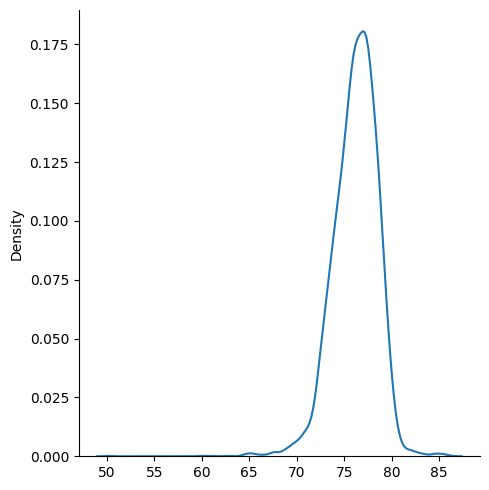

In [74]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [75]:
from sklearn.metrics import r2_score

In [76]:
score=r2_score(reg_pred,y_test)

In [77]:
score

-759.6180217571651

In [89]:
# Load Dataset
housing = fetch_california_housing(as_frame =True)
df= housing.frame

In [90]:
X = df[['MedInc']]
y = df[['MedHouseVal']]

In [92]:
#Split DataSet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
#Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
##Prediction
y_pred = model.predict(X_test)

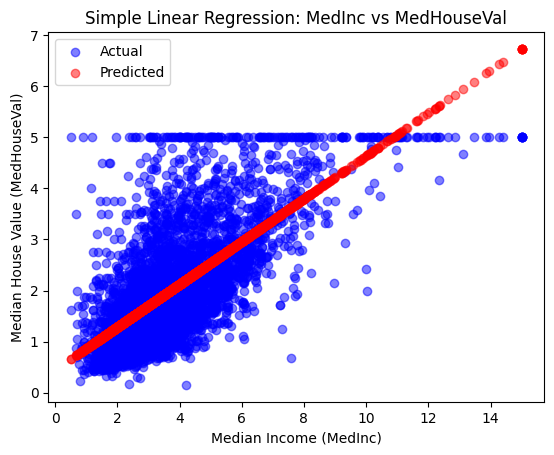

In [98]:
# Visualize regression line
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('Simple Linear Regression: MedInc vs MedHouseVal')
plt.legend()
plt.show()